In [278]:
import networkx as nx
import numpy as np
import csv
import matplotlib
import matplotlib.pylab as plt
import infomap as im
import pandas as pd;
%matplotlib inline
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from IPython.display import Image
from scipy.interpolate import griddata
import umap
from matplotlib import rc


reading the network file : ComNet_all.csv

number of nodes, n  = 1474
number of edges, m  = 21867
mean degree,    <k> = 29.67
clustering coefficient, C     =  0.19
mean geodesic distance, <ell> =  2.08


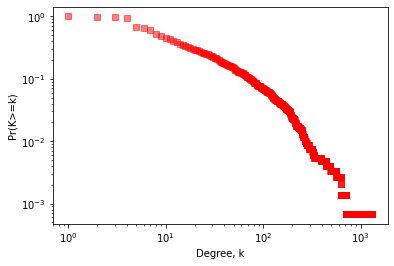

In [279]:
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return


def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return
fname1 = 'ComNet_all.csv'

# read in the network file (an edge list)
print(f'reading the network file : {fname1}\n')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings)

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
kmean = 2*m/n
C = nx.transitivity(G)
ellmean = nx.average_shortest_path_length(G)
degrees = nx.degree(G)
kis = [k for _,k in degrees]

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

plot_CCDF(kis)

# rand_partition = nx_comm.label_propagation_communities(G)
# print(community.modularity(rand_partition, G))

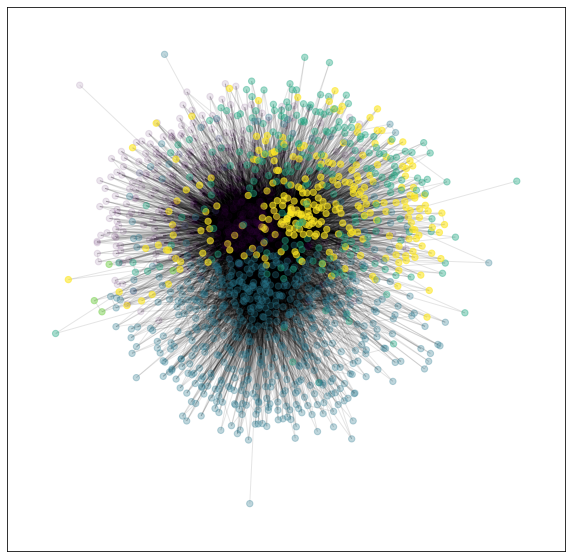

Best partition includes  6 clusters. With an overall modularity =  0.2651242088597453


In [280]:
from importlib import reload
import networkx.algorithms.community as nx_comm
from collections import deque
import matplotlib.cm as cm
import community
#from python-louvain import community_louvain
import community.community_louvain as community_lovuain
louvain_partitions = nx_comm.louvain_partitions(G, seed=123)
q = deque(louvain_partitions)

partition = community_lovuain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
fig, ax = plt.subplots(1,figsize=(10,10))
alpha=[((x+1) / 10 )for x in list(partition.values())]
nx.draw_networkx_nodes(G, pos, partition.keys(), ax=ax, node_size=40,
                       cmap=cmap, node_color=list(partition.values()), alpha=alpha, label = list(partition.values()))
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.1)
plt.show()

print('Best partition includes ', max(partition.values())+1, 'clusters. With an overall modularity = ', community.modularity(partition, G))
#drawGz(G, partition)

In [295]:
#louvain sim

test = nx_comm.louvain_communities(G, seed=123)
print(len(test))
print(nx_comm.modularity(G, test))

resolutions = np.linspace(.1, 10, 100) 
mod_per_trial = []
ntrials = 100
max_modularity = 0
out = tuple()
for i in range(len(resolutions)):
    new_partition = nx_comm.louvain_communities(G, seed=123, resolution=resolutions[i])
    curr_modularity = nx_comm.modularity(G, new_partition)
    mod_per_trial.append(curr_modularity)
    if(curr_modularity > max_modularity):
        max_modularity = curr_modularity
        out = (resolutions[i], curr_modularity, new_partition)
print(out)

5
0.26243571608501587
(0.9, 0.26440353293521235, [{'Z95.4', 'G93.8', 'I23.6', 'C61.X', 'K80.2', 'J11.0', 'D69.6', 'B34.8', 'R58.X', 'I21.9', 'J85.3', 'I62.X', 'K74.1', 'I72.1', 'E74.0', 'I35.1', 'Z94.2', 'I34.2', 'T82.3', 'I36.0', 'C85.9', 'R55.X', 'H40.9', 'Z94.1', 'I05.8', 'I35.0', 'I08.8', 'I67.0', 'I23.3', 'I45.8', 'J84.1', 'I10.0', 'J43.9', 'I45.2', 'A16.5', 'C34.9', 'N81.4', 'K71.2', 'I44.5', 'E85.9', 'C38.3', 'I74.8', 'I49.5', 'J80.X', 'F14.2', 'I44.6', 'I77.9', 'Y83.0', 'Z45.2', 'J44.8', 'I71.5', 'C34.1', 'R57.1', 'R06.0', 'I21.8', 'J90.X', 'S02.9', 'I01.8', 'C45.0', 'I49.X', 'R09.2', 'I42.5', 'I07.1', 'I42.1', 'I31.3', 'I21.4', 'E78.1', 'J15.5', 'D15.0', 'I51.4', 'I85.0', 'I40.1', 'I50.1', 'I06.1', 'I61.0', 'I25.4', 'I34.1', 'K92.8', 'I70.0', 'E66.9', 'I74.9', 'E74.3', 'R82.2', 'J44.1', 'I82.8', 'I47.1', 'I61.4', 'G92.X', 'I22.9', 'T81.2', 'Y60.8', 'I35.3', 'Y60.0', 'D76.3', 'I23.2', 'J96.1', 'Z45.9', 'I42.8', 'J15.2', 'I71.4', 'I84.9', 'Z95.1', 'I49.0', 'T82.9', 'J20.8', 'I72

Text(0, 0.5, 'Modularity Value for Partition')

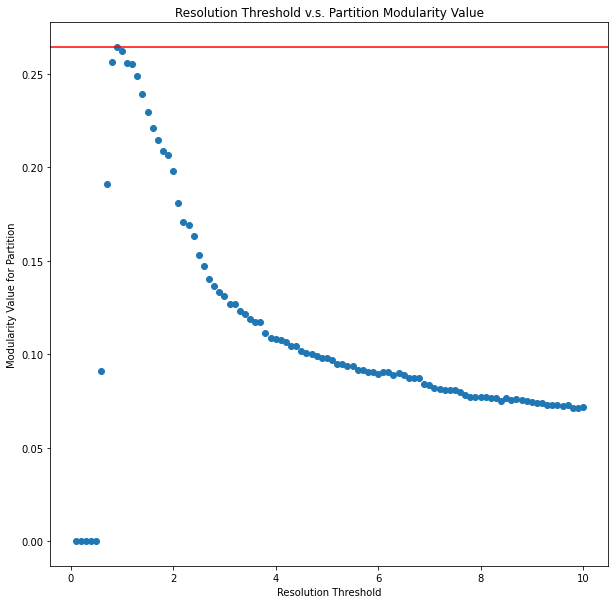

In [296]:
fig, ax = plt.subplots(1,figsize=(10,10))
threshold_modularity = out[1] #what we would expect to see, a baseline
ax.scatter(resolutions, mod_per_trial)
ax.axhline(y=threshold_modularity, color='r', linestyle='-')
ax.set_title('Resolution Threshold v.s. Partition Modularity Value')
ax.set_xlabel('Resolution Threshold')
ax.set_ylabel('Modularity Value for Partition')

Module 0 - top page ranked node:  ('I25.8', 0.007811294713381565)
Module 1 - top page ranked node:  ('I49.8', 0.016642157926316955)
Module 2 - top page ranked node:  ('Z01.7', 0.039287122607989555)
Module 3 - top page ranked node:  ('Q24.8', 0.013360327953800032)
Module 4 - top page ranked node:  ('I70.2', 0.0007519286302353108) 
 
 



Text(0.5, 1.0, 'Modular representation of the comorbidity network')

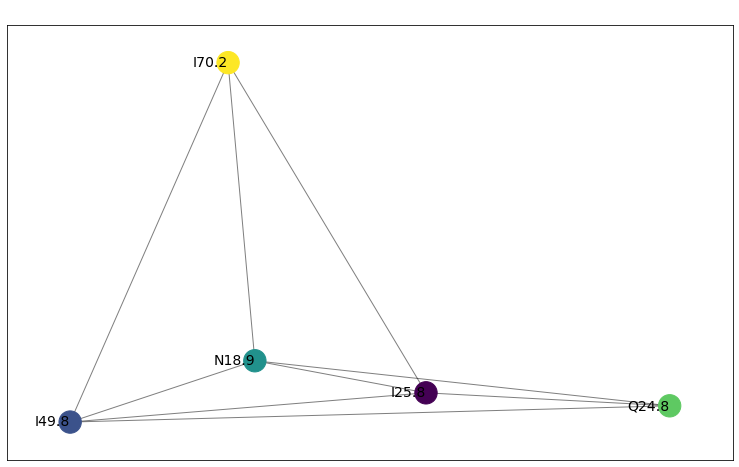

In [337]:
best_simulated_partition = {}
sim_mod0 = []
sim_mod1 = []
sim_mod2 = []
sim_mod3 = []
sim_mod4 = []
for i in range(len(out[2])):
    for node in out[2][i]:
        best_simulated_partition[node] = i
        if(i == 0):
            sim_mod0.append(node)
        if(i == 1):
            sim_mod1.append(node)
        if(i == 2):
            sim_mod2.append(node)
        if(i == 3):
            sim_mod3.append(node)
        if(i == 4):
            sim_mod4.append(node)

sim_page_rank = nx.pagerank(G, personalization=best_simulated_partition)

def compute_max_pagerank(module_nodes, page_rank_dict):
    maxi = 0
    tup = tuple()
    for node in module_nodes:
        if(maxi < page_rank_dict[node]):
            maxi = page_rank_dict[node]
            tup = (node, page_rank_dict[node])
    return tup

print('Module 0 - top page ranked node: ', compute_max_pagerank(sim_mod0, sim_page_rank))
print('Module 1 - top page ranked node: ', compute_max_pagerank(sim_mod1, sim_page_rank))
print('Module 2 - top page ranked node: ', compute_max_pagerank(sim_mod2, sim_page_rank))
print('Module 3 - top page ranked node: ', compute_max_pagerank(sim_mod3, sim_page_rank))
print('Module 4 - top page ranked node: ', compute_max_pagerank(sim_mod4, sim_page_rank), '\n \n \n')

fig, ax = plt.subplots(1,figsize=(13,8))
sim_com_G = community.induced_graph(best_simulated_partition, G)
sim_com_G.remove_edges_from(nx.selfloop_edges(sim_com_G))
pos = nx.spring_layout(sim_com_G)
cmap = cm.get_cmap('viridis', max(best_simulated_partition.values()) + 1)
nx.draw_networkx_nodes(sim_com_G, pos, ax=ax, node_size=500, cmap=cmap, node_color=[0,1,2,3,4], label=['I25.8', 'I49.8', 'N18.9', 'Q24.8', 'I70.2'])
nx.draw_networkx_edges(sim_com_G, pos,ax=ax, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_G, pos, labels={0: 'I25.8', 1: 'I49.8', 2: 'N18.9', 3: 'Q24.8', 4: 'I70.2'}, horizontalalignment='right', font_size = 14)
ax.set_title('Modular representation of the comorbidity network', color='white', size = 16)
# print('Analysis for module #2')
# sim_partition_sorted = {}
# for n in sim_mod2:
#     sim_partition_sorted[n] = sim_page_rank[n]
# {k: v for k, v in sorted(sim_partition_sorted.items(), key=lambda item: item[1])}
# print(dict(sorted(sim_partition_sorted.items(), key=lambda item: item[1])))

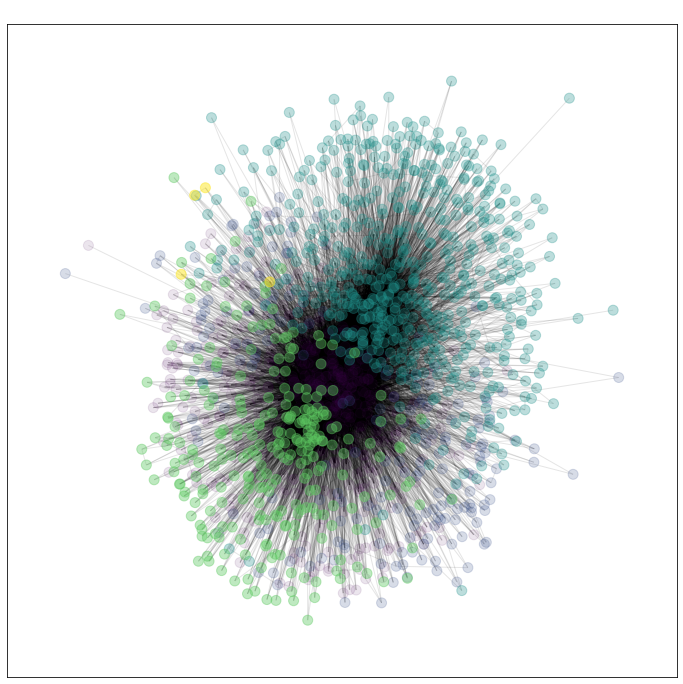

In [346]:
#graphical view of the whole network with communities highlighted
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(best_simulated_partition.values()) + 1)
fig, ax = plt.subplots(1,figsize=(12,12))
alpha=[((x+1) / 10 )for x in list(best_simulated_partition.values())]
nx.draw_networkx_nodes(G, pos, best_simulated_partition.keys(), ax=ax, node_size=100,
                       cmap=cmap, node_color=list(best_simulated_partition.values()), alpha=alpha, label = list(best_simulated_partition.values()))
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.1)
ax.set_title('Comorbidity Network with Highlighted Modules', color='white', size=16)

plt.show()

In [322]:
def sub_analysis(cluster, partition):
    max_clusters = max(partition.values())
    nodes = list(cluster.nodes())
    page_rank = nx.pagerank(cluster, personalization=partition)
    max_ranking = 0
    top_nodes = []
    for i in range(max_clusters):
        ranking = ''
        for j in range(len(nodes)):
            if(partition[nodes[j]] == i):
                temp = nodes[j]
                if(page_rank[nodes[j]] > max_ranking):
                    ranking = temp
        top_nodes.append(ranking)
    return top_nodes

G_cluster0 = nx.subgraph(G, sim_mod0)
cluster0_partitions = community.best_partition(G_cluster0)
sub_clusters_mod0 = sub_analysis(G_cluster0, cluster0_partitions)
print('Module 0 sub clusters', sub_clusters_mod0, '\n')

G_cluster1 = nx.subgraph(G, sim_mod1)
cluster1_partitions = community.best_partition(G_cluster1)
sub_clusters_mod1 = sub_analysis(G_cluster1, cluster1_partitions)
print('Module 1 sub clusters', sub_clusters_mod1, '\n')

G_cluster2 = nx.subgraph(G, sim_mod2)
cluster2_partitions = community.best_partition(G_cluster2)
sub_clusters_mod2 = sub_analysis(G_cluster2, cluster2_partitions)
print('Module 2 sub clusters', sub_clusters_mod2, '\n')

G_cluster3 = nx.subgraph(G, sim_mod3)
cluster3_partitions = community.best_partition(G_cluster3)
sub_clusters_mod3 = sub_analysis(G_cluster3, cluster3_partitions)
print('Module 3 sub clusters', sub_clusters_mod3, '\n')

G_cluster4 = nx.subgraph(G, sim_mod4)
# cluster4_partitions = community.best_partition(G_cluster4)
# sub_clusters_mod4 = sub_analysis(G_cluster4, cluster0_partitions)
# print('Module 4 sub clusters',sub_clusters_mod4)

Module 0 sub clusters ['I42.2', 'Z95.5', 'Z01.4', 'M00.8'] 

Module 1 sub clusters ['M19.9', 'N05.6', 'G40.3', 'I37.0', 'K25.3', 'Q79.6', 'K76.0', 'O99.2', 'Z29.1', 'L02.0', 'P20.0', 'R07.3', 'S27.2', 'J69.0'] 

Module 2 sub clusters ['D35.0', 'Z53.8', 'Z49.0', 'N32.1', 'N13.1', 'E12.6'] 

Module 3 sub clusters ['O99.8', 'F80.1', 'Q96.9', 'Q25.7', 'Z33.X', 'H50.8', 'P23.6'] 



Text(0.5, 1.0, 'Module Three Submodules')

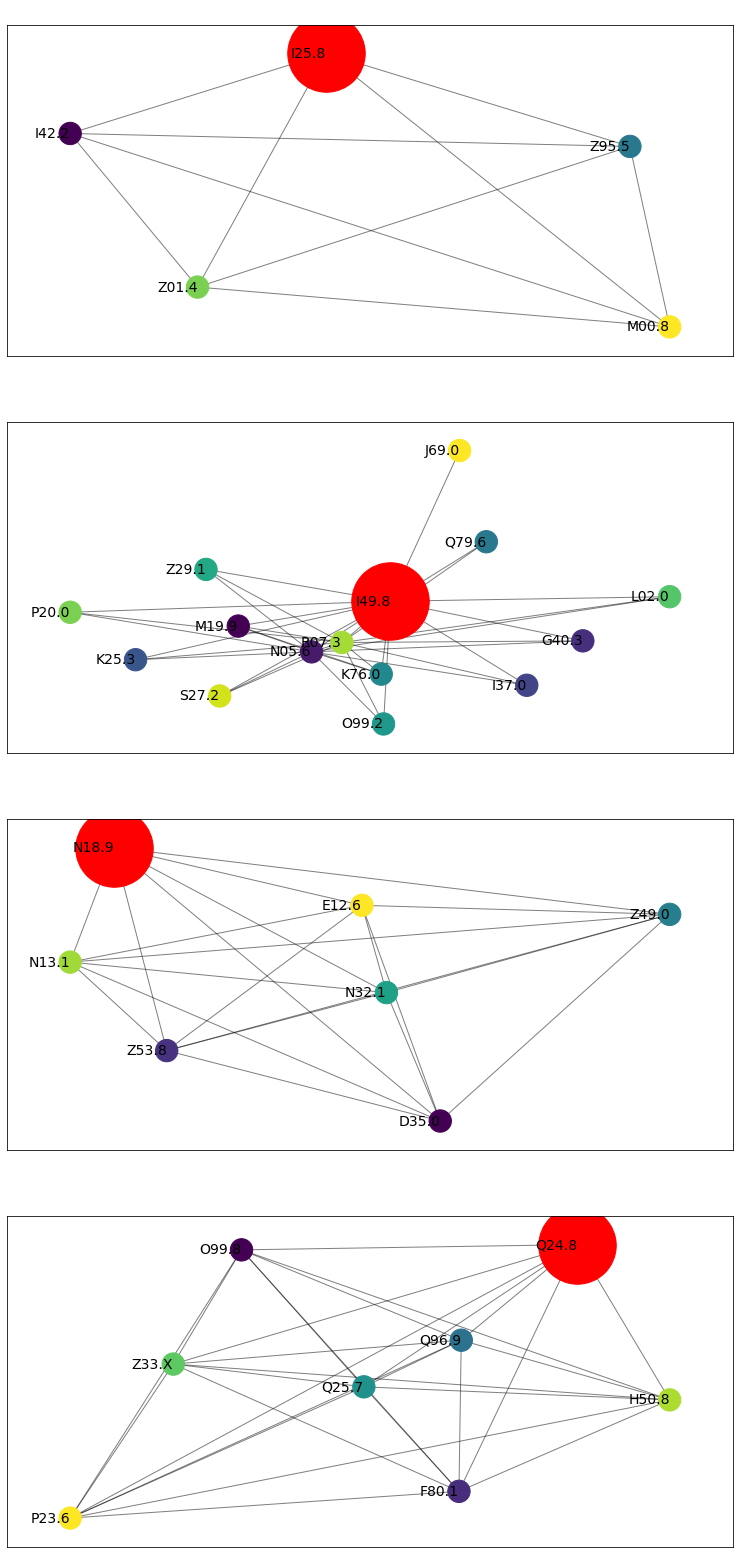

In [324]:
fig, ax = plt.subplots(4,figsize=(13,28))
sim_com_cluster0 = community.induced_graph(cluster0_partitions, G_cluster0)
sim_com_cluster0.remove_edges_from(nx.selfloop_edges(sim_com_cluster0))
sim_com_cluster0.add_node(4)
sim_com_cluster0.add_edges_from([(0,4), (1,4), (2,4), (3,4)])
pos = nx.spring_layout(sim_com_cluster0)
cmap = cm.get_cmap('viridis', max(cluster0_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster0, pos, ax=ax[0], node_size=500, cmap=cmap, nodelist=[0,1,2,3], node_color=[0,1,2,3], label=['I42.2', 'Z95.5', 'Z01.4', 'M00.8'])
nx.draw_networkx_nodes(sim_com_cluster0, pos, ax=ax[0], nodelist=[4], node_size=6000, cmap=cmap, node_color = ['red'], label=['I25.8'])
nx.draw_networkx_edges(sim_com_cluster0, pos,ax=ax[0], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster0, pos, labels={0: 'I42.2', 1: 'Z95.5', 2: 'Z01.4', 3: 'M00.8', 4: 'I25.8'}, horizontalalignment='right', font_size = 14, ax=ax[0])
ax[0].set_title('Module Zero Submodules', color='white', size = 16)



sim_com_cluster1 = community.induced_graph(cluster1_partitions, G_cluster1)
sim_com_cluster1.remove_edges_from(nx.selfloop_edges(sim_com_cluster1))
sim_com_cluster1.add_node(14)
sim_com_cluster1.add_edges_from([(0,14), (1,14), (2,14), (3,14), (4,14), (5,14), (6,14), (7,14), (8,14), (9,14), (10,14), (11,14), (12,14), (13,14)])
pos = nx.spring_layout(sim_com_cluster1)
cmap = cm.get_cmap('viridis', max(cluster1_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster1, pos, ax=ax[1], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],node_color=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], label=['M19.9', 'N05.6', 'G40.3', 'I37.0', 'K25.3', 'Q79.6', 'K76.0', 'O99.2', 'Z29.1', 'L02.0', 'P20.0', 'R07.3', 'S27.2', 'J69.0'])
nx.draw_networkx_nodes(sim_com_cluster1, pos, ax=ax[1], nodelist=[14], node_size=6000, cmap=cmap, node_color = ['red'], label=['I49.8'])
nx.draw_networkx_edges(sim_com_cluster1, pos,ax=ax[1], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster1, pos, labels={0:'M19.9', 1: 'N05.6', 2: 'G40.3', 3: 'I37.0', 4: 'K25.3', 5: 'Q79.6', 6: 'K76.0', 7:'O99.2', 8:'Z29.1', 9:'L02.0', 10:'P20.0', 11:'R07.3', 12:'S27.2', 13:'J69.0', 14: 'I49.8'}, horizontalalignment='right', font_size = 14, ax=ax[1])
ax[1].set_title('Module One Submodules', color='white', size = 16)


sim_com_cluster2 = community.induced_graph(cluster2_partitions, G_cluster2)
sim_com_cluster2.remove_edges_from(nx.selfloop_edges(sim_com_cluster2))
sim_com_cluster2.add_node(6)
sim_com_cluster2.add_edges_from([(0,6), (1,6), (2,6), (3,6), (4,6), (5,6)])
pos = nx.spring_layout(sim_com_cluster2)
cmap = cm.get_cmap('viridis', max(cluster2_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster2, pos, ax=ax[2], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5],node_color=[0,1,2,3,4,5], label=['D35.0', 'Z53.8', 'Z49.0', 'N32.1', 'N13.1', 'E12.6'])
nx.draw_networkx_nodes(sim_com_cluster2, pos, ax=ax[2], nodelist=[6], node_size=6000, cmap=cmap, node_color = ['red'], label=['N18.9'])
nx.draw_networkx_edges(sim_com_cluster2, pos,ax=ax[2], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster2, pos, labels={0: 'D35.0', 1: 'Z53.8', 2: 'Z49.0', 3: 'N32.1', 4: 'N13.1', 5: 'E12.6', 6: 'N18.9'}, horizontalalignment='right', font_size = 14, ax=ax[2])
ax[2].set_title('Module Two Submodules', color='white', size = 16)

sim_com_cluster3 = community.induced_graph(cluster3_partitions, G_cluster3)
sim_com_cluster3.remove_edges_from(nx.selfloop_edges(sim_com_cluster3))
sim_com_cluster3.add_node(7)
sim_com_cluster3.add_edges_from([(0,7), (1,7), (2,7), (3,7), (4,7), (5,7), (6,7)])
pos = nx.spring_layout(sim_com_cluster3)
cmap = cm.get_cmap('viridis', max(cluster3_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster3, pos, ax=ax[3], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5,6],node_color=[0,1,2,3,4,5,6], label=['O99.8', 'F80.1', 'Q96.9', 'Q25.7', 'Z33.X', 'H50.8', 'P23.6'])
nx.draw_networkx_nodes(sim_com_cluster3, pos, ax=ax[3], nodelist=[7], node_size=6000, cmap=cmap, node_color = ['red'], label=['Q24.8'])
nx.draw_networkx_edges(sim_com_cluster3, pos,ax=ax[3], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster3, pos, labels={0: 'O99.8', 1: 'F80.1', 2:'Q96.9', 3:'Q25.7', 4:'Z33.X', 5:'H50.8', 6:'P23.6', 7: 'Q24.8'}, horizontalalignment='right', font_size = 14, ax=ax[3])
ax[3].set_title('Module Three Submodules', color='white', size = 16)



### Summary of Comorbidity Network Clusters
| Cluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 451 | I25.8 | Other forms of chronic ischemic heart disease | 
| 1 | 196 | I49.8 | Other specified cardiac arrhythmias | 
| 2 | 554 | N18.9 | Chronic kidney disease, unspecified | 
| 3 | 269 | Q24.8 | Other specified congenital malformations of heart | 
| 4 | 4 | I70.2 | Atherosclerosis of native arteries of the extremities | 

### Cluster Zero Analysis - This Module is Represented by I25.8 (Other forms of chronic ischemic heart disease)
| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 89 | I42.2 | Other hypertrophic cardiomyopathy | 
| 1 | 111 | Z95.5 | Presence of coronary angioplasty implant and graft | 
| 2 | 91 | Z01.4 | Encounter for gynecological examination | 
| 3 | 46 | M00.8 | Arthritis and polyarthritis due to other bacteria| 


### Cluster One Analysis - This Module is Represented by I49.8 (Other specified cardiac arrhythmias)
| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 12 | M19.9 | Osteoarthritis, unspecified site| 
| 1 | 67 | N05.6 | Unspecified nephritic syndrome with dense deposit disease | 
| 2 | 4 | G40.3 | Generalized idiopathic epilepsy and epileptic syndromes | 
| 3 | 3 | I37.0 | Arthritis and polyarthritis due to other bacteria| 
| 4 | 5 | K25.3| Nonrheumatic pulmonary valve stenosis |
| 5 | 3 | Q79.6| Ehlers-Danlos syndromes |
| 6 | 12 | K76.0| Fatty (change of) liver, not elsewhere classified |
| 7 | 4 | O99.2| Endocrine, nutritional and metabolic diseases complicating pregnancy, childbirth and the puerperium |
| 8 | 2 | Z29.1| Encounter for prophylactic immunotherapy |
| 9 | 2 | L02.0| Cutaneous abscess, furuncle and carbuncle of face |
| 10 | 2 | P20.0| Intrauterine hypoxia first noted before onset of labour |
| 11 | 69 | R07.3| Other chest pain|
| 12 | 6 | S27.2| Traumatic hemopneumothorax |
| 13 | 2 | J69.0| Pneumonitis due to inhalation of food and vomit |


### Cluster Two Analysis - This Module is Represented by N18.9 (Chronic kidney disease, unspecified)

| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- |
| 0 | 45 | D35.0 | Benign neoplasm of adrenal gland | 
| 1 | 107 | Z53.8 | Procedure and treatment not carried out for other reasons | 
| 2 | 41 | Z49.0 | Preparatory care for renal dialysis | 
| 3 | 110 | N32.1 | Vesicointestinal fistula | 
| 4 | 99 | N13.1 | Hydronephrosis with ureteral stricture, not elsewhere classified | 
| 5 | 97 | E12.6 | Malnutrition-related diabetes mellitus with other specified complications | 


### Cluster Three Analysis - This Module is Represented by Q24.8 (Other specified congenital malformations of heart)

| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- |
| 0 | 24 | O99.8 | Other specified diseases and conditions complicating pregnancy, childbirth and the puerperium |
| 1 | 23 | F80.1 | Expressive language disorder |
| 2 | 58 | Q96.9 | Turner's syndrome, unspecified |
| 3 | 46 | Q25.7 | Other congenital malformations of pulmonary artery |
| 4 | 40 | Z33.X | Pregnant state |
| 5 | 31 | H50.8 | Other specified strabismus |
| 6 | 11 | P23.6 | Congenital pneumonia due to other bacterial agents |


In [336]:
# Module 0 sub clusters ['I42.2', 'Z95.5', 'Z01.4', 'M00.8'] 

# Module 1 sub clusters ['M19.9', 'N05.6', 'G40.3', 'I37.0', 'K25.3', 'Q79.6', 'K76.0', 'O99.2', 'Z29.1', 'L02.0', 'P20.0', 'R07.3', 'S27.2', 'J69.0'] 
#[12, 67, 4, 3, 5, 3, 12, 4, 2, 2, 2, 69, 6]
# Module 2 sub clusters ['D35.0', 'Z53.8', 'Z49.0', 'N32.1', 'N13.1', 'E12.6'] 

# Module 3 sub clusters ['O99.8', 'F80.1', 'Q96.9', 'Q25.7', 'Z33.X', 'H50.8', 'P23.6'] 
count0 = 0
count1 = 0
count2 = 0
count3 = 0
counts = [0,0,0,0,0,0,0]

for node in G_cluster3:
    i = cluster3_partitions[node] 
    if(i == 0):
        counts[0] +=1
    if(i == 1):
        counts[1] +=1
    if(i == 2):
        counts[2] +=1
    if(i == 3):
        counts[3] +=1
    if(i == 4):
        counts[4] +=1
    if(i == 5):
        counts[5] +=1
    if(i == 6):
        counts[6] += 1

print(counts)

[24, 23, 58, 46, 40, 31, 11]


Module 0 sub clusters [('Z01.4', 0.00017894269669496642), ('Z95.5', 0.0063599585923127385), ('R00.0', 0.0011842710848833128), ('I42.2', 0.0042624128051843325)] 

Module 1 sub clusters [('T87.2', 0.0018050751913887514), ('G40.3', 0.002685108585277294), ('N05.6', 0.0022984962440203306), ('I37.0', 0.0035086921156653275), ('K25.3', 0.003940762987053221), ('Q79.6', 0.005538266590094833), ('K76.0', 0.004522523041913615), ('O99.2', 0.0034581088591353034), ('Z29.1', 0.0052728672588901425), ('L02.0', 0.004427411443642573), ('P20.0', 0.005961361750934206), ('M19.9', 0.012197659217854734), ('S27.2', 0.00975839598515709), ('J69.0', 0.021326459547638624)] 

Module 2 sub clusters [('N32.1', 0.00023565294346529603), ('N13.1', 0.0005638559289807076), ('Z53.8', 0.0006739019241792294), ('K51.9', 0.0006608335217887652), ('Y84.6', 0.0007334783511760592), ('E00.9', 0.0008282317538185597), ('Q60.5', 0.0015242933303087688), ('I13.1', 0.002512413035986648)] 

Module 3 sub clusters [('H50.8', 0.0005742569174369824), ('Q96.9', 0.002083988826602889), ('Q26.4', 0.00702893289195399), ('E66.0', 0.0011477686745885508), ('I27.8', 0.005110935775319645), ('Z33.X', 0.002311929727332152)] 

In [347]:
print(cluster0_partitions['I25.8'])

1


In [277]:
len(sim_mod4)

4